### Mathematics Lesson for Machine Learning assignment 2 Question of going down Mt. Fuji

In [147]:
import numpy as np
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


#### [Problem 1] Visualization of data

<function matplotlib.pyplot.show>

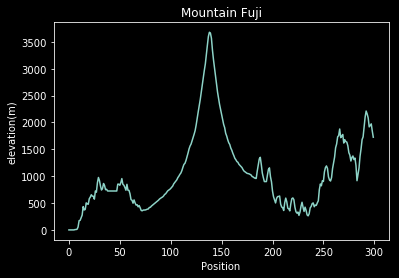

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.title("Mountain Fuji")
plt.xlabel("Position")
plt.ylabel("elevation(m)")
plt.plot(fuji[:,0], fuji[:,3])
plt.show

#### [Problem 2] Create a function to calculate the slope of a point

In [149]:
def slopefunc(point):
    elv_chng = fuji[:,0][point] - fuji[:,0][point-1]
    pos_chng = fuji[:,3][point] - fuji[:,3][point-1]
    slope = pos_chng/elv_chng
    return slope
print(slopefunc(-1))

-115.55999999999995


#### [Problem 3] Create a function to calculate the destination

In [150]:
def dest_calc(c_point,alpha,slope):
    dest_point = c_point - alpha*slope
    if(dest_point<= 0):
        return 0
    else:
        return round(dest_point)
alpha= 0.2
c_point = 65
print(dest_calc(c_point,alpha,slopefunc(c_point)))

76.0


#### [Problem 4] Creating a function to go down the mountain

In [151]:
def calc_go_down(c_pos,alpha_2):
    slope_2 = slopefunc(c_pos)
    positions = [c_pos]
    for counter in range(fuji.size):
        c_pos = int(dest_calc(c_pos,alpha_2,slope_2))
        if(positions[-1] == c_pos):
            break
        else:
            positions.append(c_pos)
    return positions
alpha_2 = 0.2
c_position =136
print(calc_go_down(c_position,alpha_2))

[136, 102, 68, 34, 0]


#### [Problem 5] Visualization of the descent process

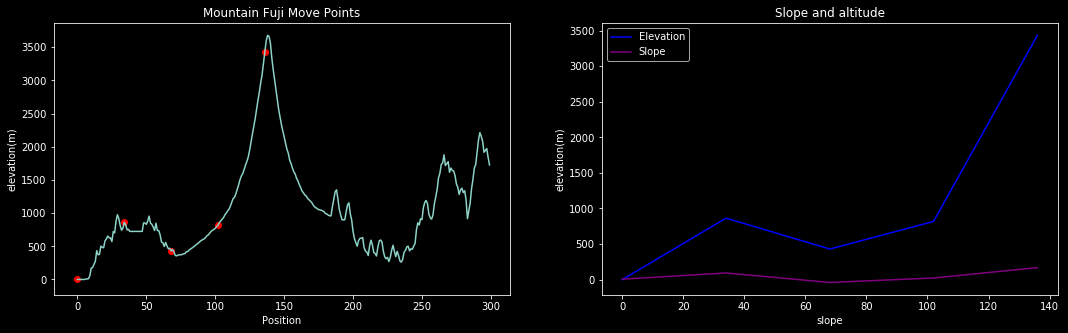

In [152]:
positions_arry = calc_go_down(136,alpha_2)

figure =plt.figure(figsize=(18,5), facecolor="black")
fig1 = figure.add_subplot(1,2,1)
fig1.set_title("Mountain Fuji Move Points")
fig1.set_xlabel("Position")
fig1.set_ylabel("elevation(m)")
fig1.plot(fuji[:,0], fuji[:,3])
fig1.scatter(positions_arry,[fuji[c_position, 3] for c_position in  positions_arry],c="red" )

fig2 = figure.add_subplot(1,2,2)
fig2.set_title("Slope and altitude")
fig2.set_xlabel("slope")
fig2.set_ylabel("elevation(m)")
fig2.plot(positions_arry,[fuji[c_position, 3] for c_position in  positions_arry],c="blue",label="Elevation" )
fig2.plot(positions_arry,[slopefunc(c_position) for c_position in  positions_arry],c="purple",label="Slope" )

fig2.legend()
plt.show()





[Problem 6] Change of initial value

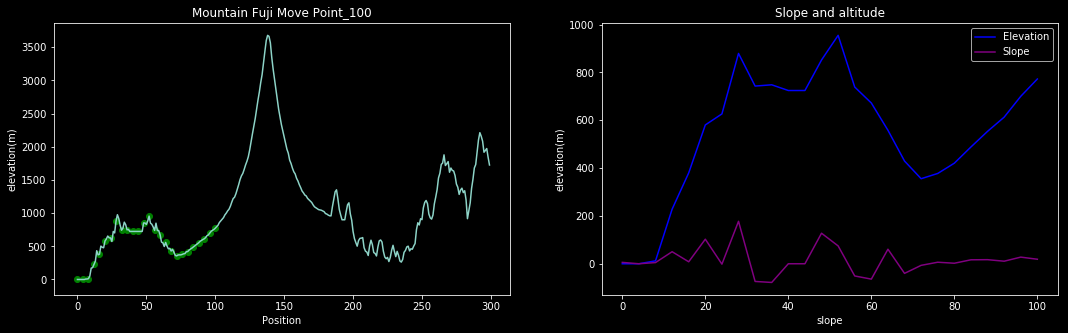

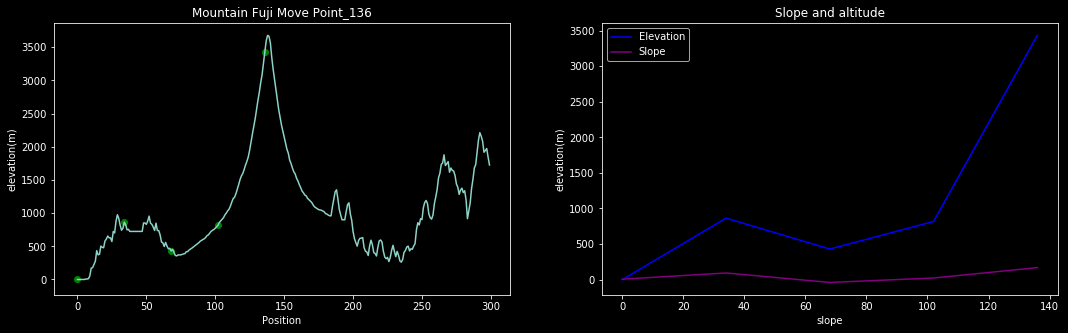

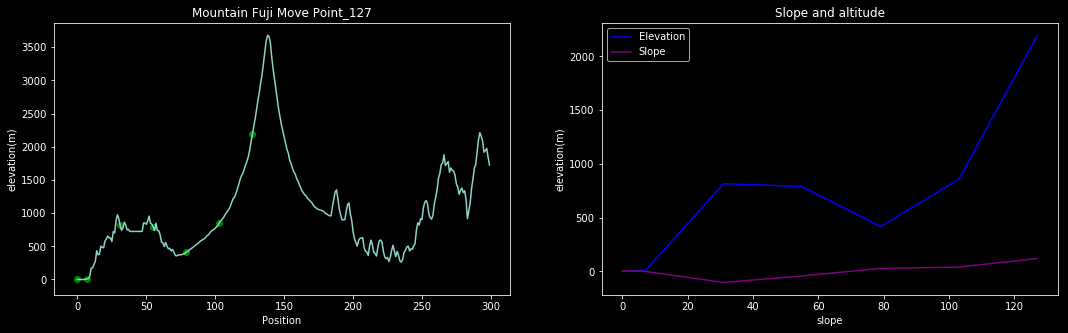

In [153]:
def graph_on_points(points):

   
    
    for point_g in range(points.size):
        alpha3 = 0.2
        positions_arry2= calc_go_down(points[point_g],alpha3)
        figure =plt.figure(figsize=(18,5))
        fig1 = figure.add_subplot(1,2,1)
        fig1.set_title("Mountain Fuji Move Point_{}".format(points[point_g]))
        fig1.set_xlabel("Position")
        fig1.set_ylabel("elevation(m)")
        fig1.plot(fuji[:,0], fuji[:,3])
        fig1.scatter(positions_arry2,[fuji[c_position, 3] for c_position in  positions_arry2],c="green" )

        fig2 = figure.add_subplot(1,2,2)
        fig2.set_title("Slope and altitude")
        fig2.set_xlabel("slope")
        fig2.set_ylabel("elevation(m)")
        fig2.plot(positions_arry2,[fuji[c_position, 3] for c_position in  positions_arry2],c="blue",label="Elevation" )
        fig2.plot(positions_arry2,[slopefunc(c_position) for c_position in  positions_arry2],c="purple",label="Slope" )

        fig2.legend()
        plt.show()

points =np.array([100,136,127])
graph_on_points(points)

#### [Problem 7] (Advance problem) Change hyperparameters

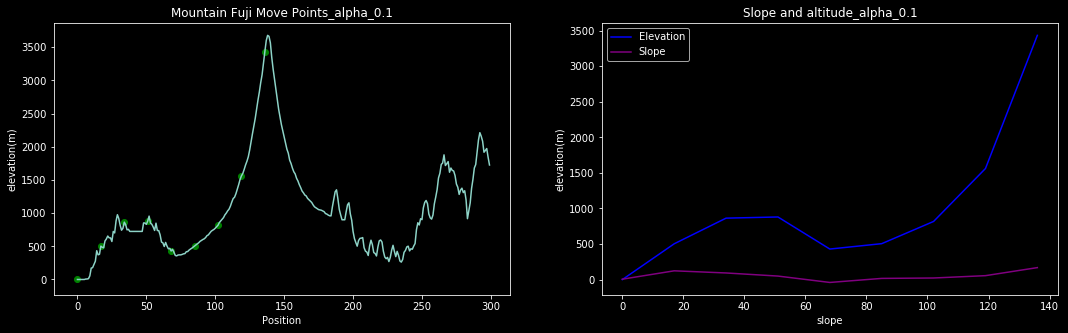

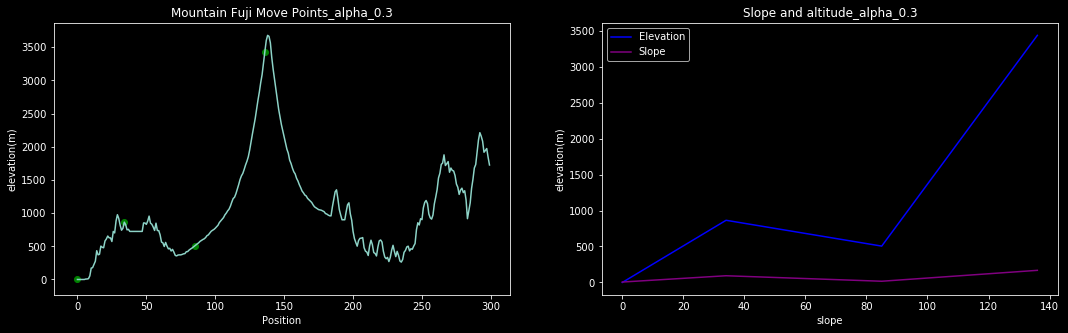

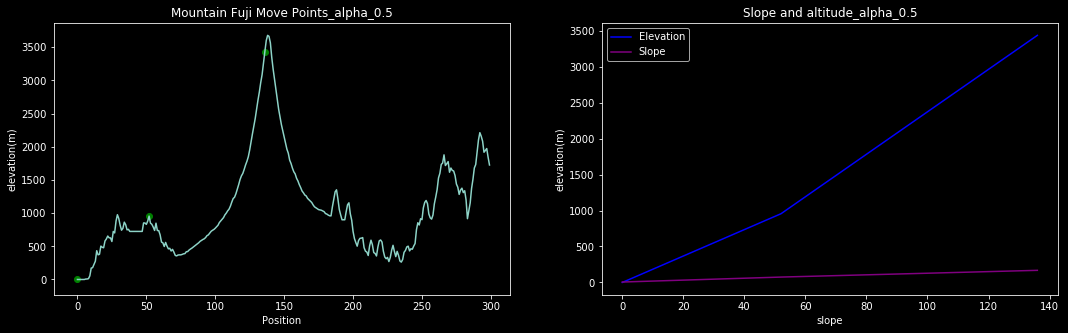

In [154]:
def graph_on_alpha(alpha7):

   
    
    for point_7 in range(points.size):
       
        positions_arry2= calc_go_down(136,alpha7[point_7])
        figure =plt.figure(figsize=(18,5))
        fig1 = figure.add_subplot(1,2,1)
        fig1.set_title("Mountain Fuji Move Points_alpha_{}".format(alpha7[point_7]))
        fig1.set_xlabel("Position")
        fig1.set_ylabel("elevation(m)")
        fig1.plot(fuji[:,0], fuji[:,3])
        fig1.scatter(positions_arry2,[fuji[c_position, 3] for c_position in  positions_arry2],c="green" )

        fig2 = figure.add_subplot(1,2,2)
        fig2.set_title("Slope and altitude_alpha_{}".format(alpha7[point_7]))
        fig2.set_xlabel("slope")
        fig2.set_ylabel("elevation(m)")
        fig2.plot(positions_arry2,[fuji[c_position, 3] for c_position in  positions_arry2],c="blue",label="Elevation" )
        fig2.plot(positions_arry2,[slopefunc(c_position) for c_position in  positions_arry2],c="purple",label="Slope" )

        fig2.legend()
        plt.show()

alpha7 =np.array([0.1,0.3,0.5])
graph_on_alpha(alpha7)